In [84]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Problem Statement
<b>Objective:<b><br>

To categorise the countries using socio-economic and health factors that determine the overall development of the country.<br><br>

<b>About organization:<b><br>

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.<br><br>

<b>Problem Statement:<b><br>

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Column Name & Description
1. country	- Name of the country<br>
2. child_mort - Death of children under 5 years of age per 1000 live births<br>
3. exports- Exports of goods and services per capita. Given as %age of the GDP per capita<br>
4. health - Total health spending per capita. Given as %age of GDP per capita<br>
5. imports - Imports of goods and services per capita. Given as %age of the GDP per capita<br>
6. Income - Net income per person<br>
7. Inflation - The measurement of the annual growth rate of the Total GDP<br>
8. life_expec- The average number of years a new born child would live if the current mortality patterns are to remain the same<br>
9. total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.<br>
10. gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.


## Read the Dataset

In [85]:
# Read the dataset
df = pd.read_csv(r"Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [86]:
# Lets set country as Index
df.set_index('country',inplace=True)

In [87]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [88]:
# Checking the shape of the data
print('No. of Rows:',df.shape[0])
print('No. of Columns:',df.shape[1])

No. of Rows: 167
No. of Columns: 9


In [89]:
# Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


* There are no missing values

## Descriptive Statistics

In [90]:
# Summary statistics of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


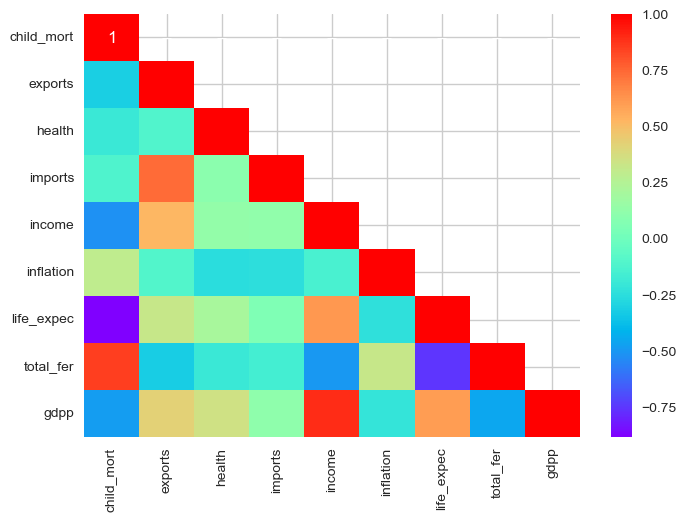

In [91]:
# Correlation between the Features
sns.heatmap(df.corr(),annot=True,cmap='rainbow',mask=np.triu(df.corr(),k=1))
plt.show()

## Visualization

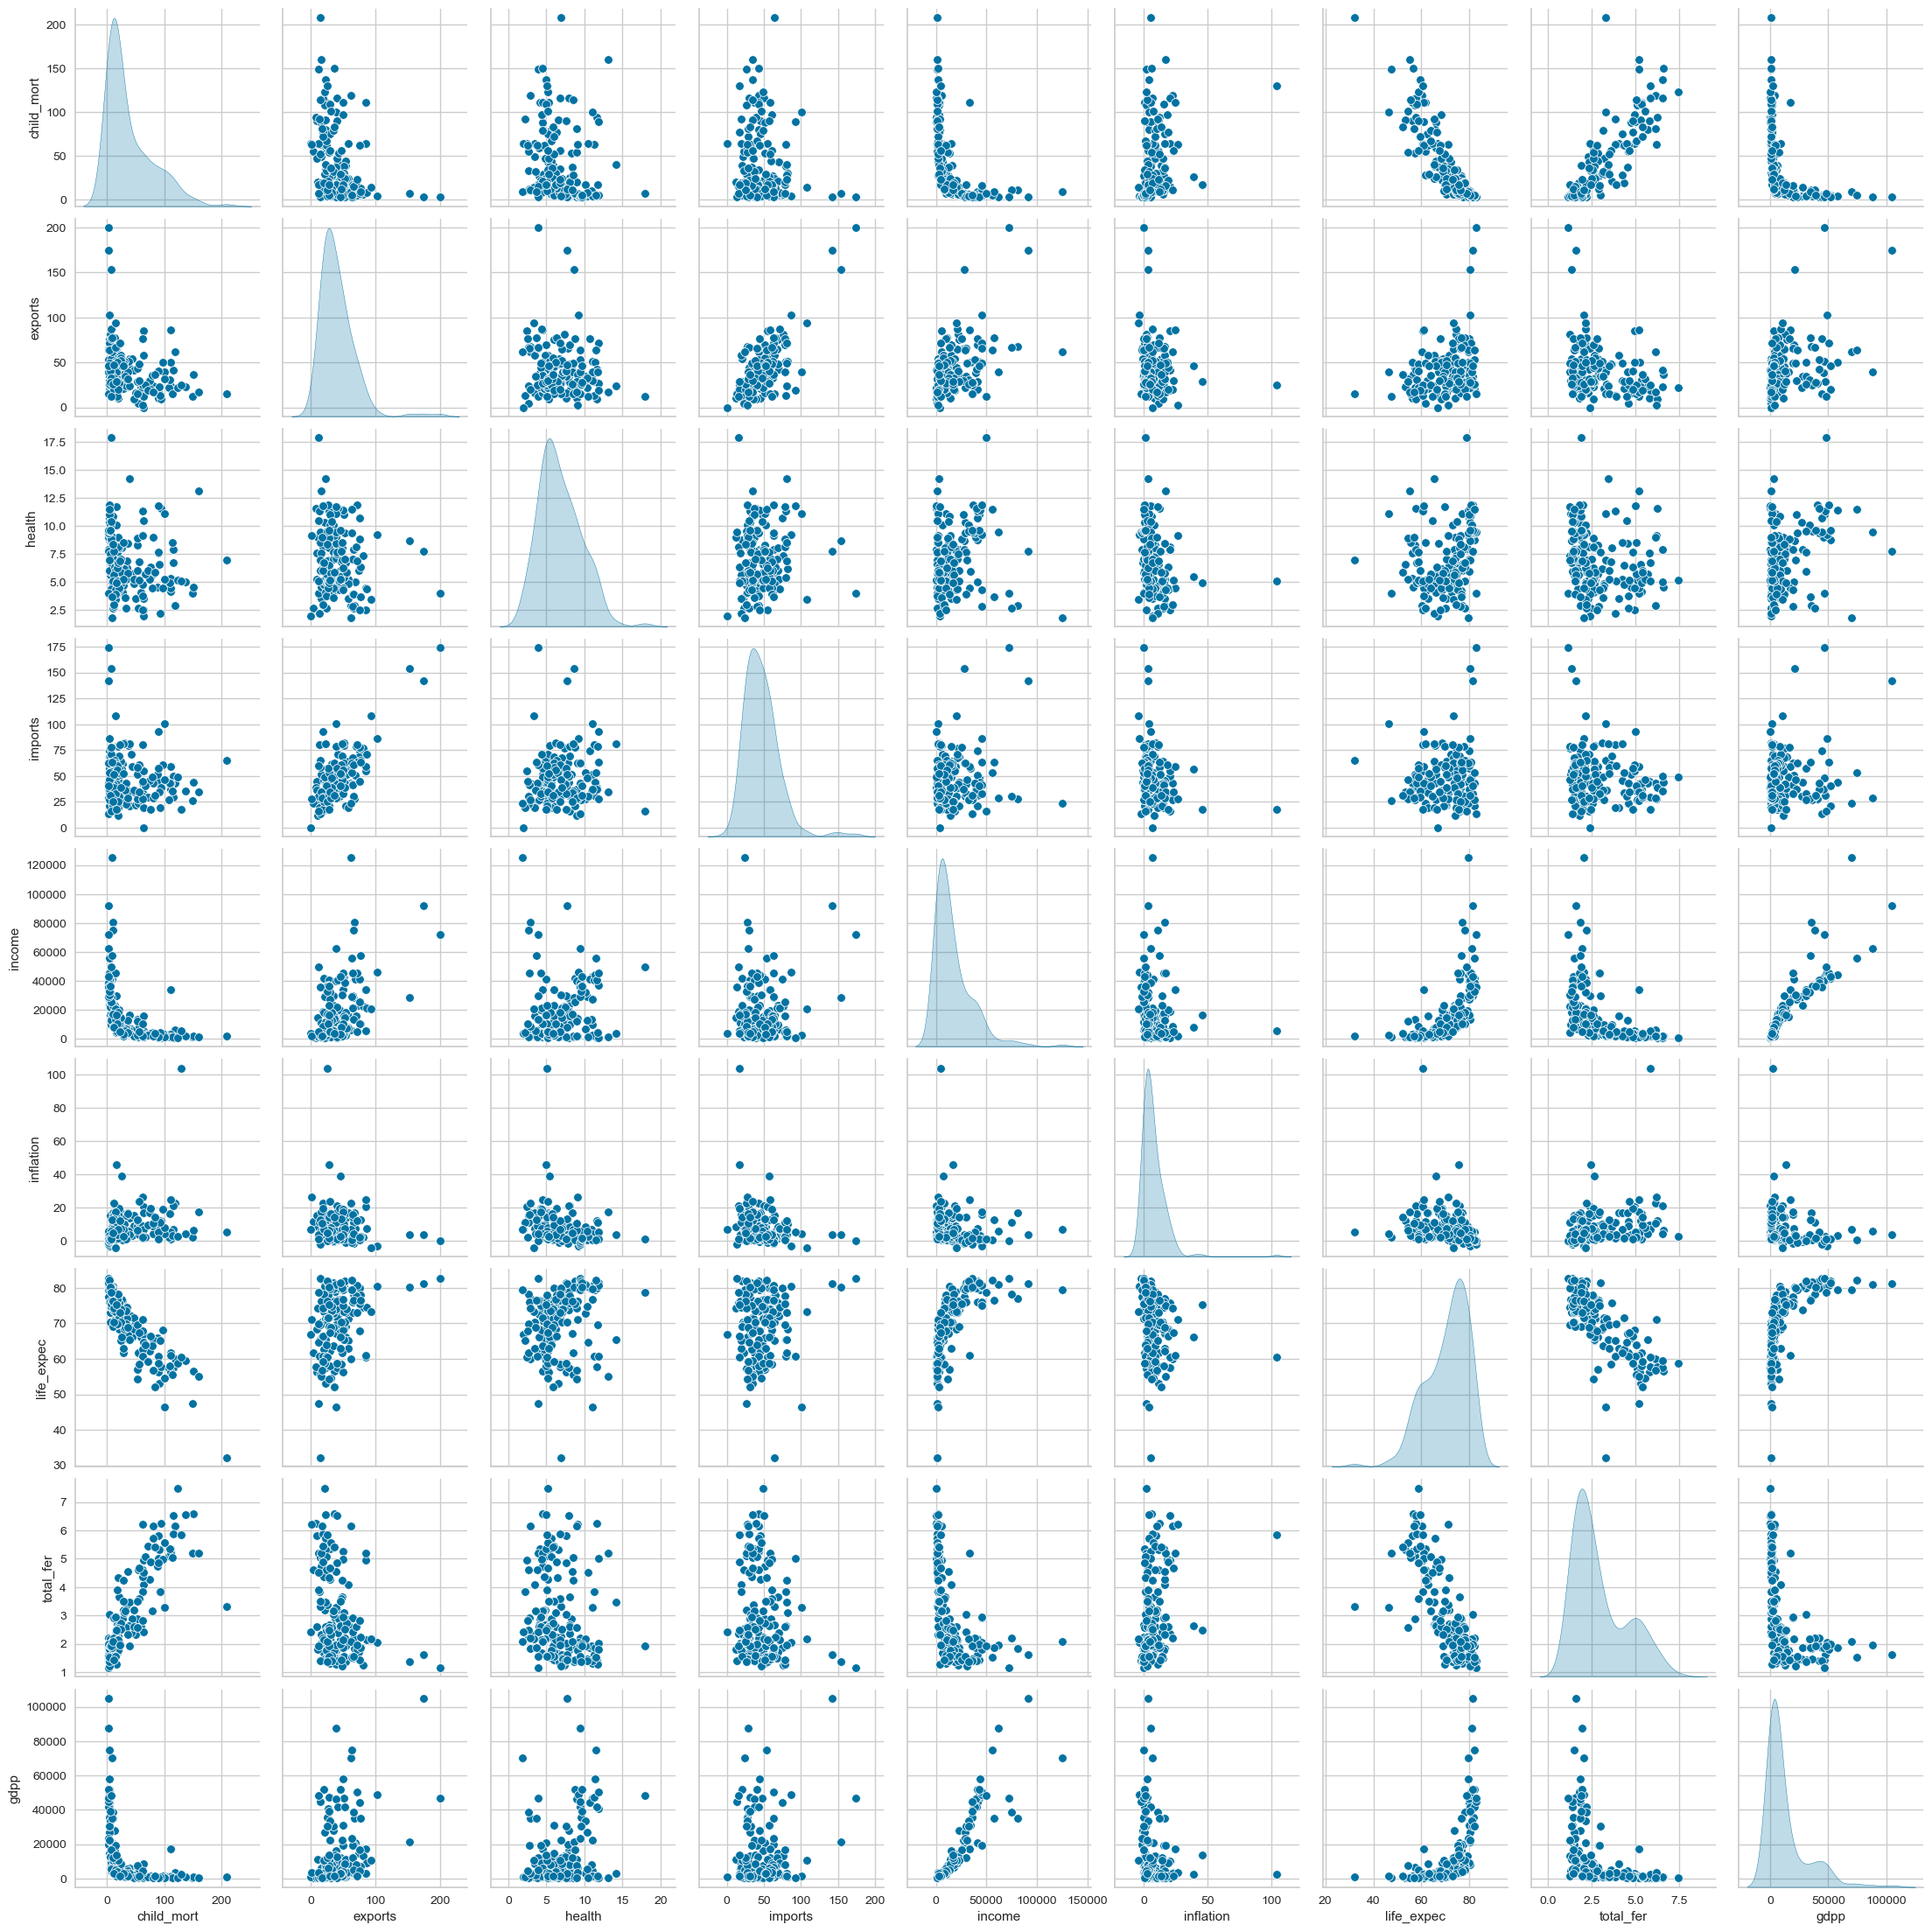

In [92]:
# Pair Plot
sns.pairplot(data=df,diag_kind='kde')
plt.show()

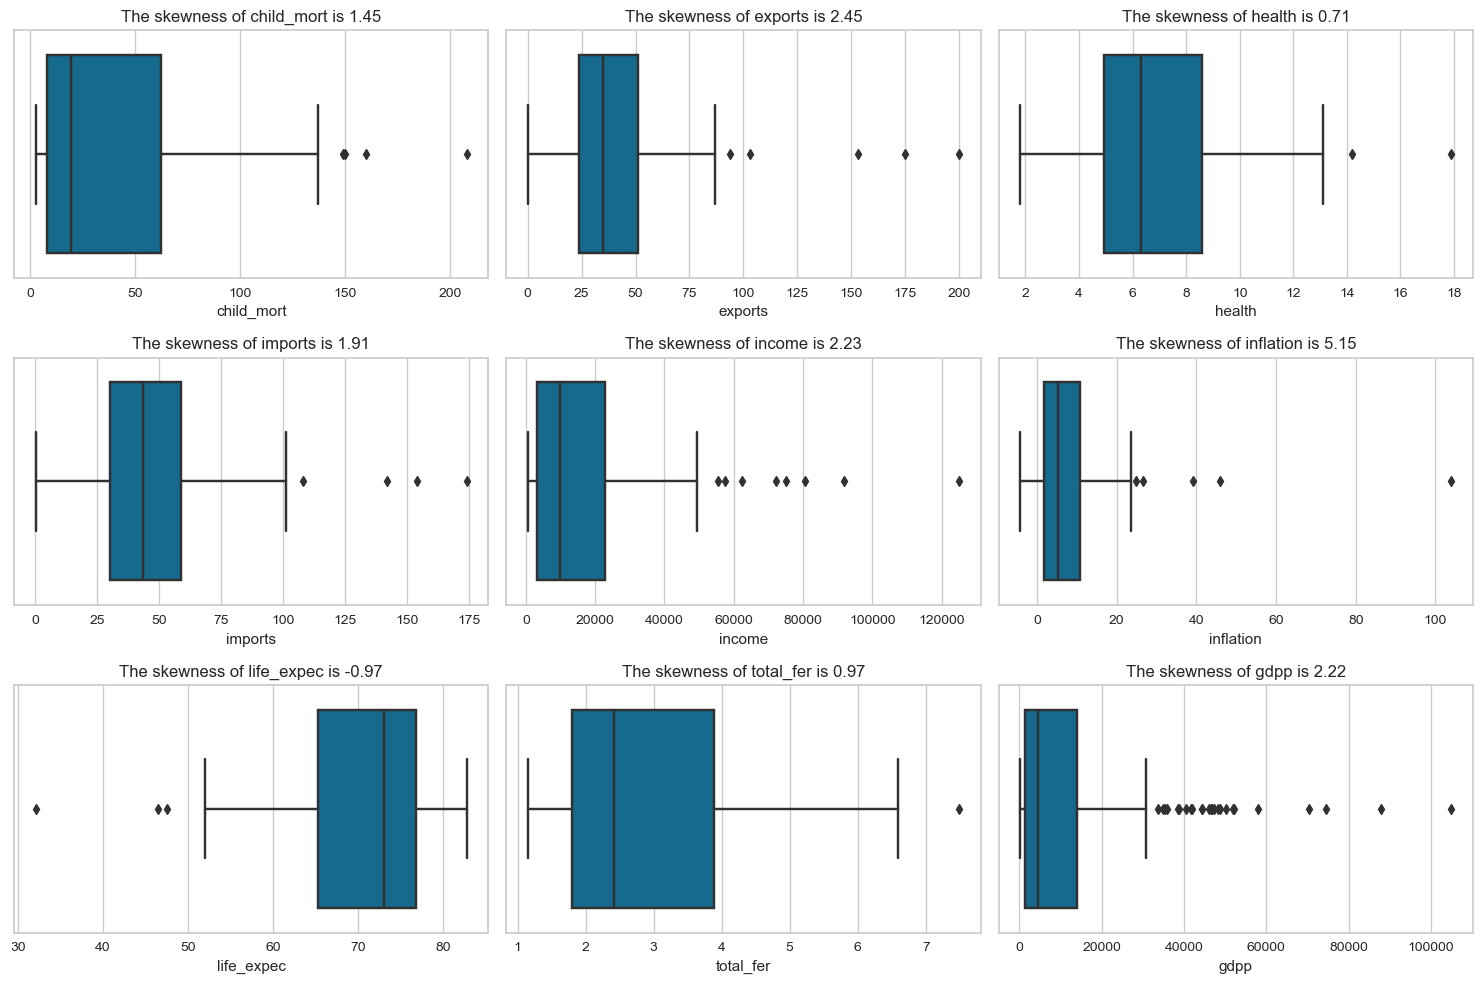

In [93]:
# Box Plot
t=1
plt.figure(figsize=[15,10])
for i in df.columns:
    plt.subplot(3,3,t)
    plt.title(f'The skewness of {i} is {round(df[i].skew(),2)}')
    sns.boxplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

## Data Preprocessing

In [94]:
# Check for missig values
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

* No missing values

In [95]:
# Checking for duplicates
df.duplicated().sum()

0

* No duplicate rows

In [96]:
# Treatment of the outliers
# Lets cap the extreme outliers (2*IQR)

for i in df:
    q3,q1 = np.quantile(df[i],[0.75,0.25])
    iqr = q3 - q1
    ul,ll = q3+2*iqr,q1-2*iqr

    df[i] = df[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

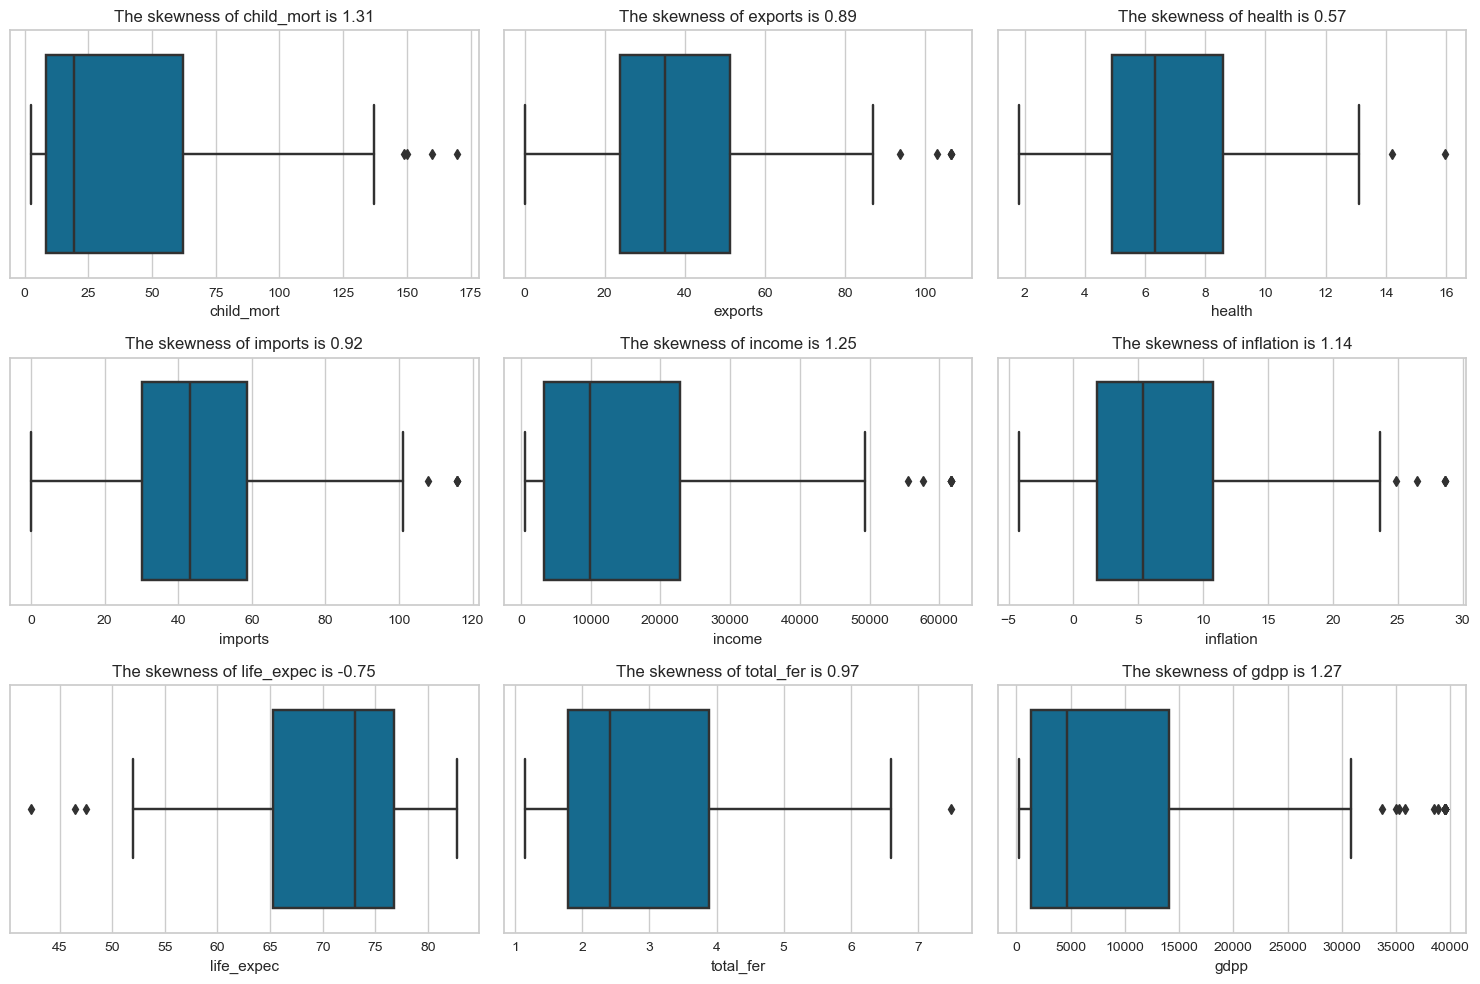

In [97]:
# Box Plot after treating the outliers
t=1
plt.figure(figsize=[15,10])
for i in df.columns:
    plt.subplot(3,3,t)
    plt.title(f'The skewness of {i} is {round(df[i].skew(),2)}')
    sns.boxplot(x=df[i])
    t+=1

plt.tight_layout()
plt.show()

In [98]:
# Scale the data.
sc = StandardScaler()
data_s = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [99]:
data_s.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
1,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
2,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362
3,2.057866,1.015243,-1.467008,-0.153900,-0.643479,2.188949,-1.218141,2.128151,-0.576385
4,-0.705149,0.255182,-0.287190,0.602137,0.171226,-0.822326,0.716194,-0.541946,0.076410


## Reduce the features using PCA


In [100]:
pca = PCA(n_components=9)
pca.fit(data_s)

PCA(n_components=9)

In [101]:
variances = pca.explained_variance_

In [102]:
variances[variances>1]

array([4.36078478, 1.50181611, 1.23490898])

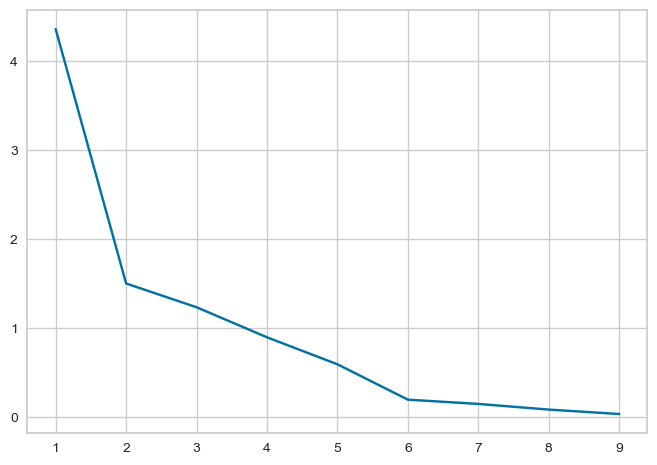

In [103]:
# Scree Plot
plt.plot(range(1,10),variances)
plt.show()

In [104]:
# Explained Variuance ratio
np.cumsum(pca.explained_variance_ratio_*100)

array([ 48.16302547,  64.74994991,  78.38899783,  88.29915158,
        94.85586154,  97.02750272,  98.66992286,  99.61020304,
       100.        ])

In [105]:
pca_final = PCA(n_components=5)
pca_df = pd.DataFrame(pca_final.fit_transform(data_s),columns=['PC1','PC2','PC3','PC4','PC5'],index=df.index)

In [106]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.099217,-0.232689,-0.972447,0.787536,-0.009905
Albania,0.427427,-0.285346,-0.242571,-1.377388,0.114011
Algeria,-0.411658,-0.526613,1.634043,-0.613283,0.459962
Angola,-3.217072,1.229145,1.983955,1.635771,0.159702
Antigua and Barbuda,1.189011,0.479460,-0.151955,-0.774114,-0.382475


### KMeans Clustering

In [107]:
# Decide the value of K

In [108]:
kelbow = KElbowVisualizer(estimator=KMeans(random_state=0),k=10)

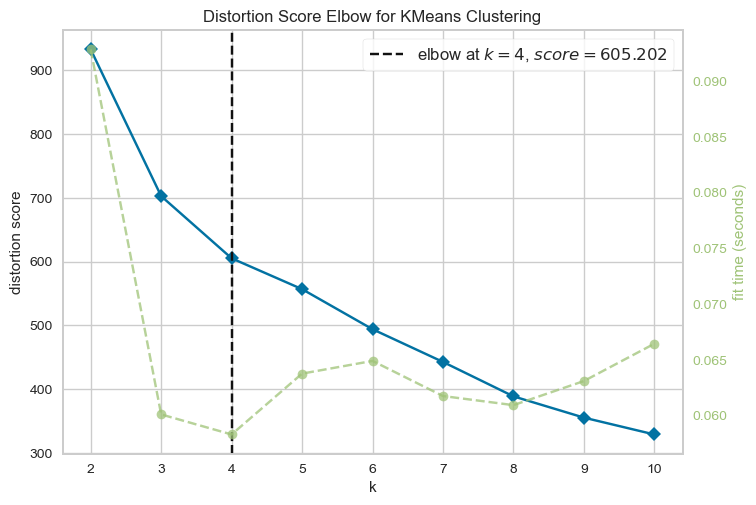

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
kelbow.fit(pca_df)
kelbow.show() # K===4/3

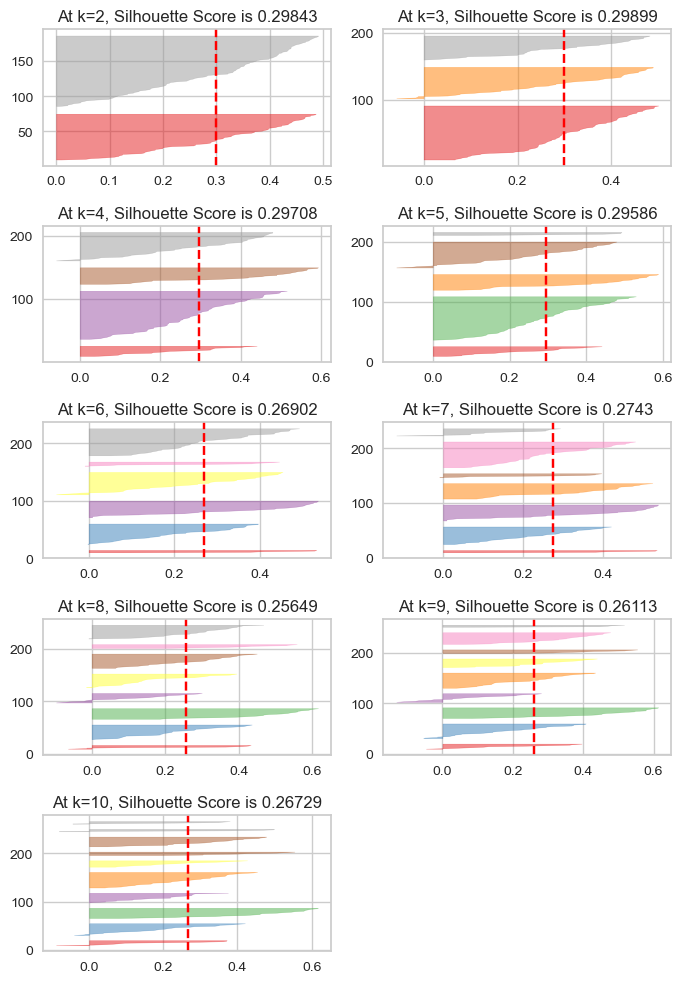

In [110]:
t=1
plt.figure(figsize=(7,10))
for i in range(2,11):
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i,random_state=0)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(pca_df)
    plt.title(f'At k={i}, Silhouette Score is {round(sil_viz.silhouette_score_,5)}')
    t+=1
plt.tight_layout()
plt.show() # Decided to go with k=3

In [111]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(pca_df)

KMeans(n_clusters=3)

In [112]:
centroids = kmeans_model.cluster_centers_
centroids

array([[ 0.18789482,  0.09749425,  0.18668634, -0.74790798,  0.18934052],
       [-2.5308199 ,  0.10840405, -0.20904521,  0.63748954, -0.14282851],
       [ 2.86681026, -0.35670063, -0.14254351,  0.83051233, -0.23432848]])

In [113]:
labels = kmeans_model.fit_predict(pca_df)
pca_df['Labels'] = labels
df['Labels'] =labels

In [114]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.099217,-0.232689,-0.972447,0.787536,-0.009905,0
Albania,0.427427,-0.285346,-0.242571,-1.377388,0.114011,1
Algeria,-0.411658,-0.526613,1.634043,-0.613283,0.459962,1
Angola,-3.217072,1.229145,1.983955,1.635771,0.159702,0
Antigua and Barbuda,1.189011,0.479460,-0.151955,-0.774114,-0.382475,1


In [115]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,1
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,1
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,1


In [116]:
value_counts = pd.Series(labels).value_counts()

In [117]:
value_counts

1    80
0    48
2    39
Name: count, dtype: int64

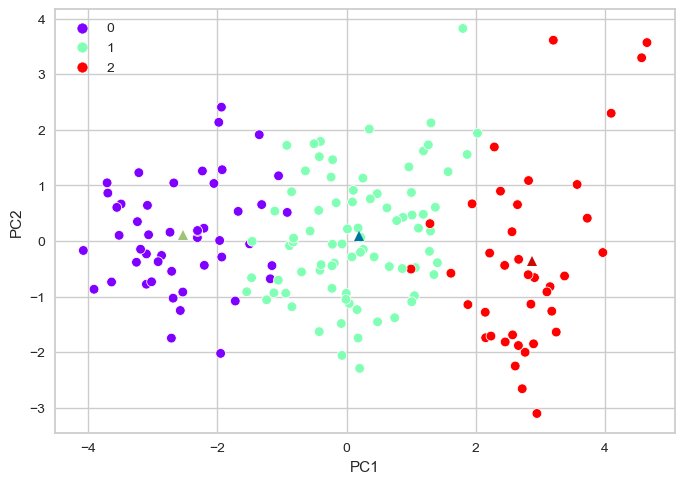

In [118]:
sns.scatterplot(y=pca_df['PC2'],x=pca_df['PC1'],hue=labels,palette='rainbow')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='^')
plt.show()

In [124]:
summary = pca_df.groupby(by='Labels')[pca_df.columns].mean()
summary

,PC1,PC2,PC3,PC4,PC5,Labels
Labels,,,,,,
0,-2.530820,0.108404,-0.209045,0.637490,-0.142829,0.0
1,0.163963,0.102344,0.130938,-0.787671,0.194379,1.0
2,2.778520,-0.343357,-0.011304,0.831133,-0.222937,2.0


In [131]:
summary = df.groupby(by='Labels')[df.columns].mean()
summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
Labels,,,,,,,,,,
0,91.570833,28.546229,6.296458,41.443040,3937.770833,10.345729,59.558333,4.953958,1902.916667,0.0
1,21.703750,40.376000,6.299500,48.372500,11454.375000,7.139862,72.807500,2.296250,5965.925000,1.0
2,5.671795,52.724359,8.463846,47.414103,41565.128205,3.296718,79.733333,1.815897,33315.641026,2.0


In [121]:
summary.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Labels
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,39.648793,40.548863,7.019935,45.743214,18985.758013,6.927437,70.699722,3.022035,13728.160897,1.0
std,45.674715,12.089992,1.250465,3.754765,19912.202371,3.529304,10.251327,1.690245,17084.467873,1.0
min,5.671795,28.546229,6.296458,41.443040,3937.770833,3.296718,59.558333,1.815897,1902.916667,0.0
25%,13.687772,34.461115,6.297979,44.428571,7696.072917,5.218290,66.182917,2.056074,3934.420833,0.5
50%,21.703750,40.376000,6.299500,47.414103,11454.375000,7.139862,72.807500,2.296250,5965.925000,1.0
75%,56.637292,46.550179,7.381673,47.893301,26509.751603,8.742796,76.270417,3.625104,19640.783013,1.5
max,91.570833,52.724359,8.463846,48.372500,41565.128205,10.345729,79.733333,4.953958,33315.641026,2.0


<Axes: xlabel='Labels'>

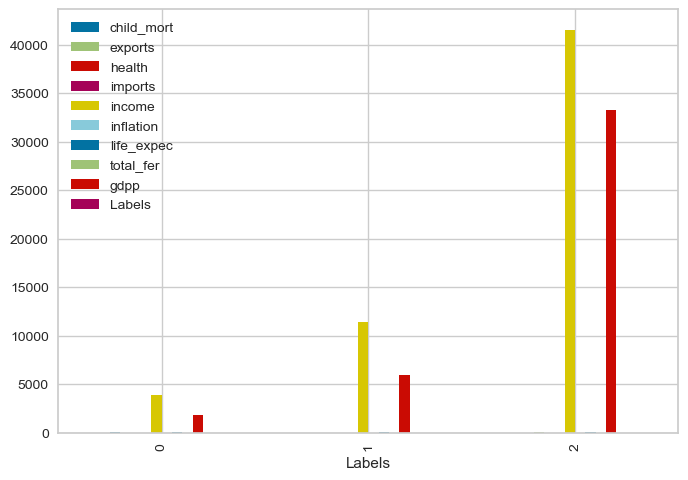

In [125]:
df.groupby(by='Labels')[df.columns].mean().plot(kind='bar')

In [128]:
df[df['Labels']==0].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

In [129]:
df[df['Labels']==1].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan',
       'Thailand', 'Tonga', 'Tun

In [136]:
df[df['Labels']==2].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'],
      dtype='object', name='country')

In [137]:
df['Labels']=df['Labels'].map({2:'Developed',1:'Developing', 0: 'Underdeveloped'})

In [138]:
df[df['Labels']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'United Arab Emirates', 'United Kingdom',
       'United States'],
      dtype='object', name='country')

In [139]:
df[df['Labels']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Serbia', 'Seychelles', 'Solomon Islands',
       'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan',
       'Thailand', 'Tonga', 'Tun

In [140]:
df[df['Labels']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

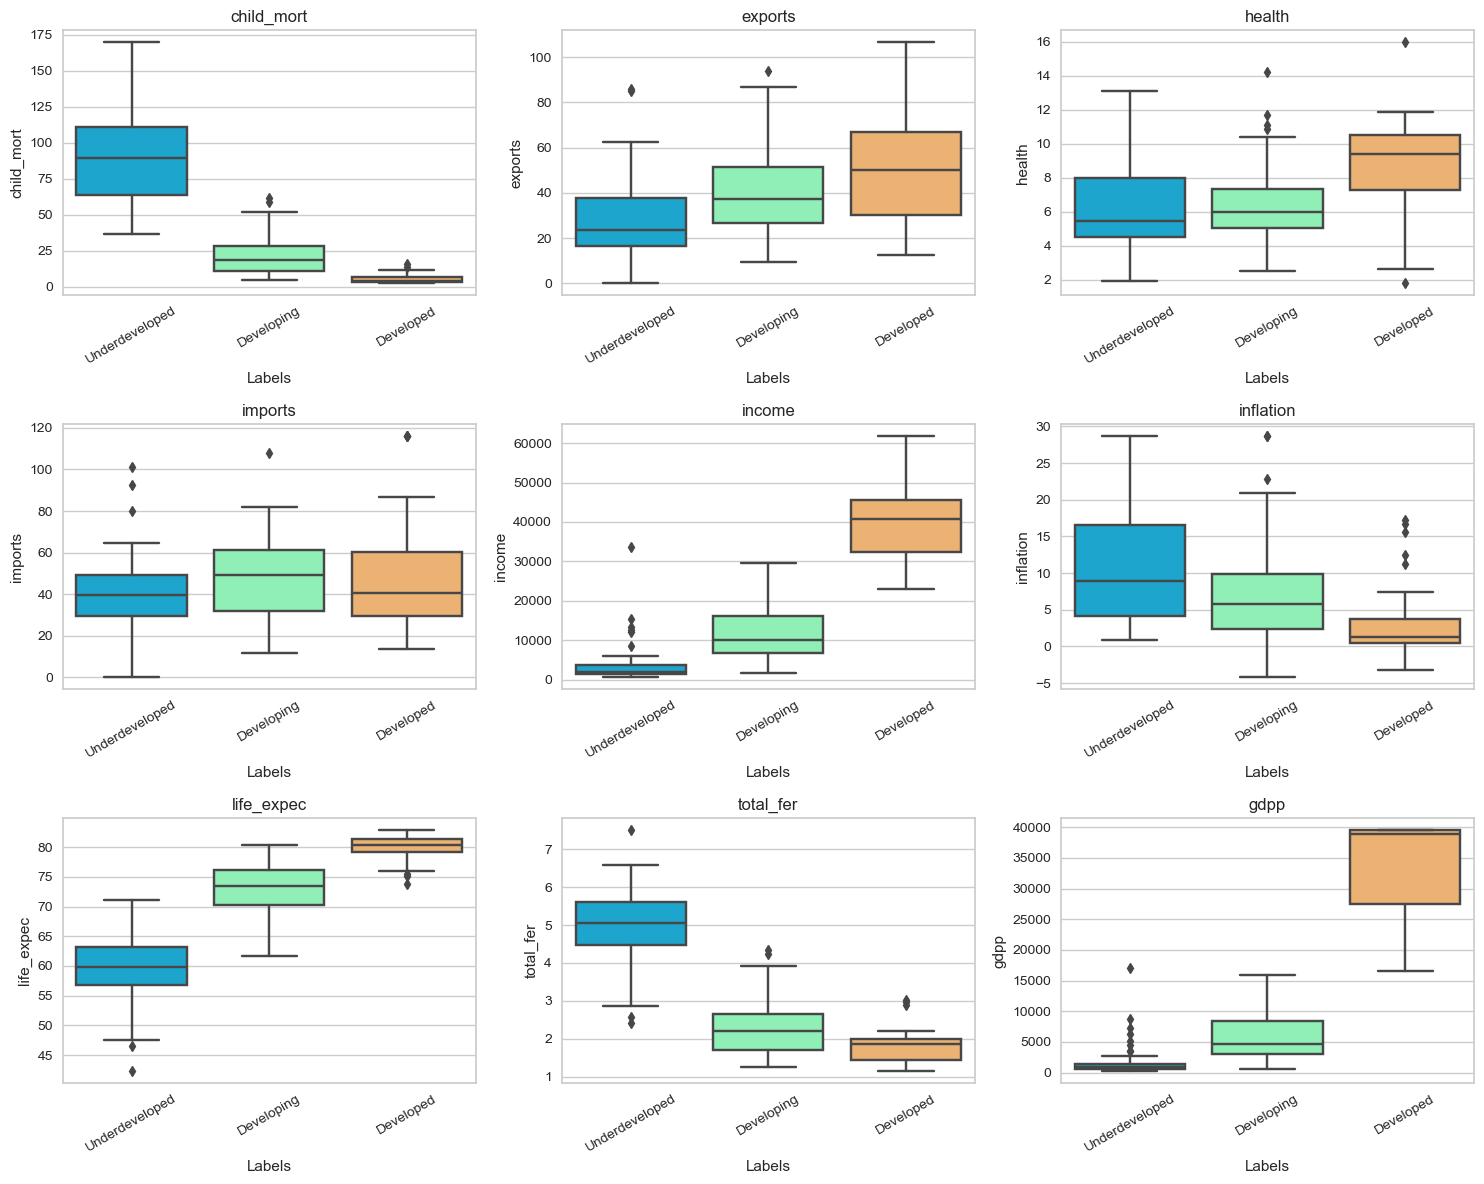

In [147]:
t = 1
plt.figure(figsize=(15, 12))
for col in df.select_dtypes('number').columns:
    plt.subplot(3, 3, t)
    sns.boxplot(data=df, y=col, x='Labels', palette='rainbow')
    plt.xticks(rotation=30)
    plt.title(col)
    t += 1

plt.tight_layout()
plt.show()

In [153]:
import plotly.express as px

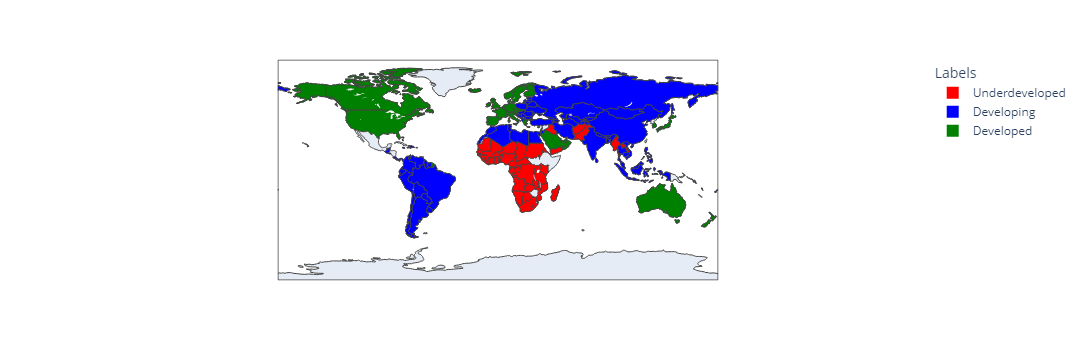

<Figure size 1500x1200 with 0 Axes>

In [165]:
plt.figure(figsize=(15, 12))
px.choropleth(df,locationmode='country names',locations=df.index,color='Labels',color_discrete_map={'Developed':'green','Developing':'blue', 'Underdeveloped':'red'})

# Summary 

In [167]:
#  The company can alocate the fund for the red coloured countries which are underveloped

# Deployment

pip install streamlit

In [174]:
# Saving the model
import pickle as pk
import streamlit as st

In [183]:
pca_final

PCA(n_components=5)

In [176]:
with open('final_model.pkl','wb') as file:
    pk.dump(kmeans_model,file)
with open('scaled_model.pkl','wb') as file:
    pk.dump(sc,file)
with open('pca_model.pkl','wb') as file:
    pk.dump(pca_final,file)

NameError: name 'DeltaGenerator' is not defined

In [185]:
kmeans_model.predict([1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533])

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.325807 -1.350898  0.287879 -0.059395 -0.908259  0.327015 -1.669872
  1.902882 -0.800533].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [187]:
data_s

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.325807,-1.350898,0.287879,-0.059395,-0.908259,0.327015,-1.669872,1.902882,-0.800533
1,-0.545011,-0.536547,-0.094264,0.115438,-0.394747,-0.384140,0.658280,-0.859973,-0.534220
2,-0.273031,-0.066034,-0.977272,-0.697302,-0.211439,1.283842,0.681446,-0.038404,-0.506362
3,2.057866,1.015243,-1.467008,-0.153900,-0.643479,2.188949,-1.218141,2.128151,-0.576385
4,-0.705149,0.255182,-0.287190,0.602137,0.171226,-0.822326,0.716194,-0.541946,0.076410
...,...,...,...,...,...,...,...,...,...
162,-0.224735,0.304948,-0.576579,0.309173,-0.825554,-0.652799,-0.882238,0.365754,-0.618549
163,-0.532302,-0.513926,-0.702723,-1.349384,0.010754,3.083999,0.554034,-0.316678,0.174291
164,-0.374705,1.454087,0.013330,1.608612,-0.730505,0.709171,0.287629,-0.661206,-0.743536
165,0.464112,-0.446064,-0.602550,-0.555545,-0.731122,2.361350,-0.361010,1.140944,-0.743536
